# Applied Data Science
## Tesco Dataset Analysis - Graham Davies




### Task 1: Describe the Dataset
Import

In [23]:
import numpy as np
import pandas as pd
import os

# Need to import all csvs and include the name 

csv_files = [file for file in os.listdir('csvs')]

dfs = []

for csv_file in csv_files:
    if 'year' in csv_file and 'borough' in csv_file:  
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join('csvs/',csv_file))
        
        # Extract the month and area
        #month = csv_file.split('_')[0]  
        
        # Add a new column with the month
        #df['Month'] = month
        
        # Append the DataFrame to the list
        dfs.append(df)

tesco_b = pd.concat(dfs, ignore_index=True)

<bound method NDFrame.head of       area_id      weight  weight_perc2.5  weight_perc25  weight_perc50  \
0   E09000001  323.174750            35.0          150.0          250.0   
1   E09000002  421.304125            32.5          165.6          300.0   
2   E09000003  407.170491            40.0          180.0          320.0   
3   E09000004  359.544126            30.0          144.0          255.0   
4   E09000005  434.324141            40.0          175.0          325.0   
5   E09000006  319.336273            30.0          135.0          250.0   
6   E09000007  348.420414            35.0          150.0          260.0   
7   E09000008  353.636123            30.0          150.0          250.0   
8   E09000009  358.569245            35.0          154.0          275.0   
9   E09000010  416.062456            40.0          180.0          325.0   
10  E09000011  403.189686            37.5          170.0          305.0   
11  E09000012  405.993196            40.0          175.0          308.

### Variable descriptions

area_id: identifier of the area

weight: Weight of the average food product, in grams

volume: Volume of the average drink product, in liters

energy: Nutritional energy of the average product, in kcals

energy_density: Concentration of calories in the area's average product, in kcals/gram

{nutrient}: Weight of {nutrient} in the average product, in grams. Possible nutrients are: carbs, sugar, fat, saturated fat, protein, fibre. The count of carbs include sugars and the count of fats includes saturated fats

energy_{nutrient}: Amount of energy from {nutrient} in the average product, in kcals

h_nutrients_weight: Diversity (entropy) of nutrients weight

h_nutrients_weight_norm: Diversity (entropy) of nutrients weight, normalized in [0,1]

h_nutrients_calories: Diversity (entropy) of energy from nutrients

h_nutrients_calories_norm. Diversity (entropy) of energy from nutrients, normalized in [0,1]

f_{category}: Fraction of products of type {category} purchased. Possible categories are: beer, dairy, eggs, fats & oils, fish, fruit & veg, grains, red meat, poultry, readymade, sauces, soft drinks, spirits, sweets, tea & coffee, water, and wine.

f_{category}_weight: Fraction of total product weight given by products of type {category}

h_category: Diversity (entropy) of food product categories

h_category_norm: Diversity (entropy) of food product categories, normalized in [0,1]

h_category_weight: Diversity (entropy) of weight of food product categories

h_category_weight_norm: Diversity (entropy) of weight of food product categories, normalized in [0,1].

representativeness_norm: The ratio between the number of unique customers in the area and the number of residents as measured by the census; values are min-max normalized in [0,1] across all areas

transaction_days: Number of unique dates in which at least one purchase has been made by one of the residents in the area.

num_transactions: Total number of products purchased by Clubcard owners who are resident in the area.

man_day: Cumulative number of man-days of purchase (number of distinct days a customer has purchased something, summed all individual customers)

population: Total population of residents in the area according to the 2015 census.

male: Total male population in the area.

female: Total female population in the area.

age_0_17: Total number of residents between 0 and 17 years old

age_18_64: Total number of residents between 18 and 64 years old.

age_65+: Total number of residents aged 65 years or more.

avg_age: Average age of residents according to the 2015 census

area_sq_km: Surface of the area (km^2)

people_per_sq_km: Population density per km^2

In [28]:
len(tesco_b['avg_age'])

33

### Task 2: Visualise the Dataset

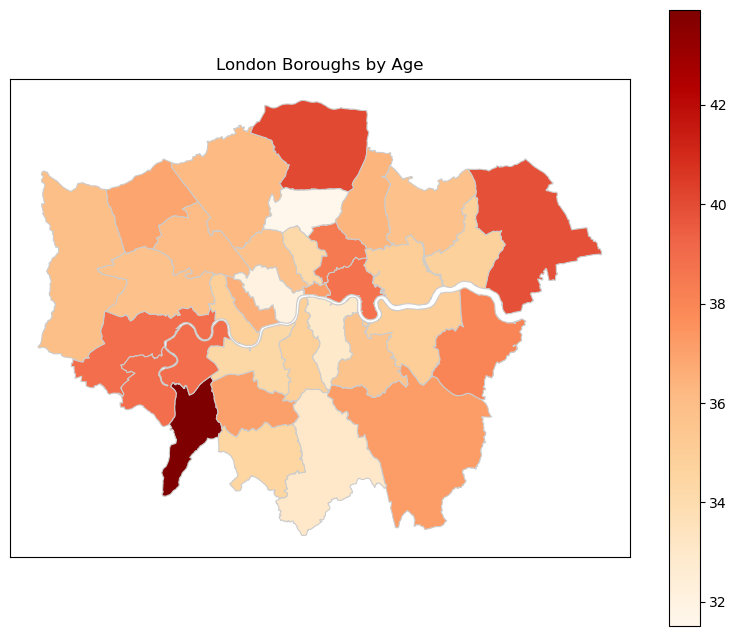

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt


borough_shapes = gpd.read_file("london_boroughs_shapefile.shx")

merged_data = borough_shapes.merge(tesco_b['avg_age'], left_index=True, right_index=True)

# Plot the merged data with legend
fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='avg_age', cmap='OrRd', 
                 linewidth=0.8, ax=ax, edgecolor='0.8', 
                 legend=True, label = merged_data.index)
ax.set_title('London Boroughs by Age')


# Remove x and y axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Show the plot
plt.show()

In [38]:
#len(tesco_b['avg_age'])
len(borough_shapes)

33

### Task 3: Combing Datasets

### Task 4: Presentation

### Task 5: Executive Summary